## Модель оттока клиентов

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

Данные

In [2]:
data= pd.read_csv('../../data/Telco_Churn_Data.csv')
data.head()

,Target Churn,Target Code,Current Bill Amt,Avg Calls,Avg Calls Weekdays,Account Age,Percent Increase MOM,Acct Plan Subtype,Complaint Code,Avg Days Delinquent,Current TechSupComplaints,Current Days OpenWorkOrders,Equipment Age,Condition of Current Handset,Avg Hours WorkOrderOpenned
0,No Churn,0,14210,17950.000000,30297.0000,24,-0.334193,Gold,Billing Problem,6.2,0,0.0,8,1.0,0.0
1,Churn,1,14407,0.000000,0.0000,28,0.000000,Silver,Moving,1.0,0,0.0,17,1.0,0.0
2,Churn,1,12712,204.666667,10393.6667,23,0.000000,Gold,Billing Problem,17.6,0,0.0,23,1.0,0.0
3,No Churn,0,13807,15490.333300,41256.3333,39,0.148986,Silver,Billing Problem,0.0,0,0.0,17,1.0,0.0
4,No Churn,0,3805,5075.000000,12333.3333,23,-0.686047,Gold,Billing Problem,3.8,0,0.0,10,1.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target Churn                  4708 non-null   object 
 1   Target Code                   4708 non-null   int64  
 2   Current Bill Amt              4708 non-null   int64  
 3   Avg Calls                     4708 non-null   float64
 4   Avg Calls Weekdays            4708 non-null   float64
 5   Account Age                   4708 non-null   int64  
 6   Percent Increase MOM          4708 non-null   float64
 7   Acct Plan Subtype             4708 non-null   object 
 8   Complaint Code                4701 non-null   object 
 9   Avg Days Delinquent           4708 non-null   float64
 10  Current TechSupComplaints     4708 non-null   int64  
 11  Current Days OpenWorkOrders   4708 non-null   float64
 12  Equipment Age                 4708 non-null   int64  
 13  Con

In [4]:
data.columns=data.columns.str.replace(' ', '_')

In [5]:
data.columns

Index(['Target_Churn', 'Target_Code', 'Current_Bill_Amt', 'Avg_Calls',
       'Avg_Calls_Weekdays', 'Account_Age', 'Percent_Increase_MOM',
       'Acct_Plan_Subtype', 'Complaint_Code', 'Avg_Days_Delinquent',
       'Current_TechSupComplaints', 'Current_Days_OpenWorkOrders',
       'Equipment_Age', 'Condition_of_Current_Handset',
       'Avg_Hours_WorkOrderOpenned'],
      dtype='object')

In [6]:
data.describe()

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_TechSupComplaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_of_Current_Handset,Avg_Hours_WorkOrderOpenned
count,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4708.000000,4264.000000,4708.000000
mean,0.485769,19828.815845,9269.690314,38127.994973,26.079652,-0.005127,13.968564,0.414826,2.438828,10.811810,1.019231,0.936501
std,0.499851,17204.510108,10437.339850,39172.244943,7.149933,4.481852,10.789062,0.954549,20.197292,8.710548,0.144021,8.926752
min,0.000000,-690.000000,0.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,12288.000000,2602.250002,13031.250025,20.000000,-0.574084,6.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,0.000000,15254.000000,6396.333330,26765.833350,25.000000,-0.185280,12.400000,0.000000,0.000000,9.000000,1.000000,0.000000
75%,1.000000,22799.000000,12250.499975,50061.416675,32.000000,0.121823,19.300000,0.000000,0.000000,17.000000,1.000000,0.000000
max,1.000000,325127.000000,181786.000000,374457.667000,40.000000,210.100000,126.000000,11.000000,368.000000,39.000000,3.000000,297.500000


In [7]:
data.describe(include='object')

,Target_Churn,Acct_Plan_Subtype,Complaint_Code
count,4708,4708,4701
unique,2,2,6
top,No Churn,Silver,Billing Problem
freq,2421,3914,2908


Процент пропущенных данных

In [8]:
round(data.isnull().sum()/len(data)*100, 2)

Target_Churn                    0.00
Target_Code                     0.00
Current_Bill_Amt                0.00
Avg_Calls                       0.00
Avg_Calls_Weekdays              0.00
Account_Age                     0.00
Percent_Increase_MOM            0.00
Acct_Plan_Subtype               0.00
Complaint_Code                  0.15
Avg_Days_Delinquent             0.00
Current_TechSupComplaints       0.00
Current_Days_OpenWorkOrders     0.00
Equipment_Age                   0.00
Condition_of_Current_Handset    9.43
Avg_Hours_WorkOrderOpenned      0.00
dtype: float64

In [9]:
data.Complaint_Code.value_counts()

Billing Problem         2908
Call Quality            1070
Moving                   511
Check Account            195
Inaccurate Sales Inf      13
Pricing                    4
Name: Complaint_Code, dtype: int64

In [10]:
data.Condition_of_Current_Handset.value_counts()

1.0    4186
2.0      74
3.0       4
Name: Condition_of_Current_Handset, dtype: int64

Заполнить пропуски

In [11]:
data['Complaint_Code'] = data['Complaint_Code'].fillna(value='Billing Problem') 
data['Condition_of_Current_Handset'] = data['Condition_of_Current_Handset'].fillna(value=1) 

Соотношение ушедших к оставшимся

In [12]:
data['Target_Churn'].value_counts(1)*100

No Churn    51.42311
Churn       48.57689
Name: Target_Churn, dtype: float64

In [13]:
summary_churn = data.groupby('Target_Churn')
summary_churn.mean()

,Target_Code,Current_Bill_Amt,Avg_Calls,Avg_Calls_Weekdays,Account_Age,Percent_Increase_MOM,Avg_Days_Delinquent,Current_TechSupComplaints,Current_Days_OpenWorkOrders,Equipment_Age,Condition_of_Current_Handset,Avg_Hours_WorkOrderOpenned
Target_Churn,,,,,,,,,,,,
Churn,1.0,20182.709226,9348.878298,37524.030899,25.418452,-0.281309,19.075339,0.459117,2.498907,11.191517,1.016616,0.960482
No Churn,0.0,19494.510120,9194.885309,38698.530221,26.704254,0.255769,9.144444,0.372986,2.382074,10.453119,1.018174,0.913846


Матрица корреляции

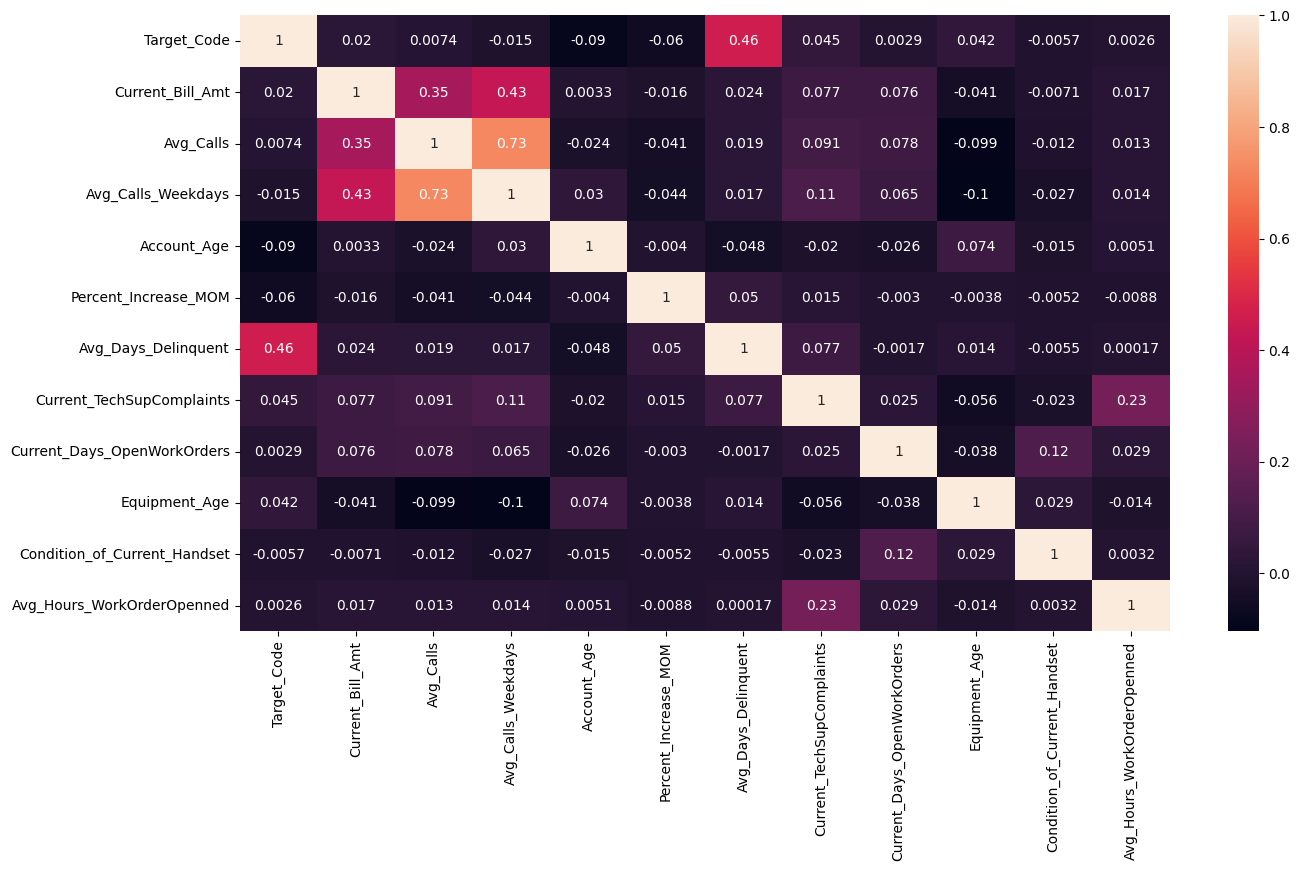

In [15]:
corr = data.corr() 
plt.figure(figsize=(15,8)) 
sns.heatmap(corr,
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,
            annot=True,);

Распределение

На всех графиках наблюдается правосторонняя ассиметрия

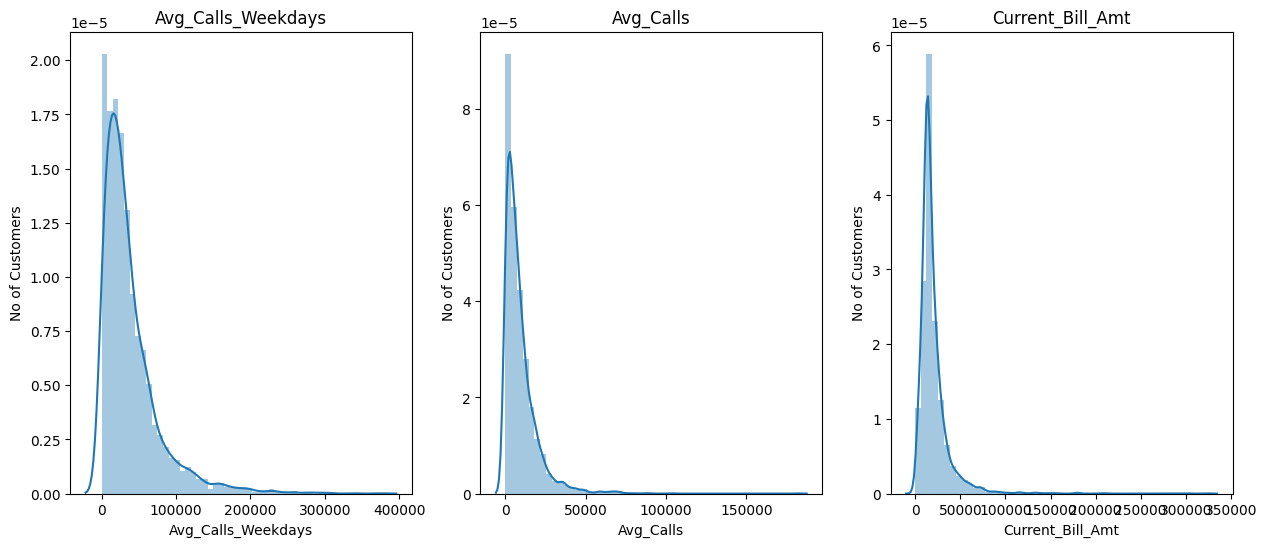

In [18]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6)) 
sns.distplot(data.Avg_Calls_Weekdays, kde=True, ax=axes[0]).set_title('Avg_Calls_Weekdays') 
axes[0].set_ylabel('No of Customers')

sns.distplot(data.Avg_Calls, kde=True, ax=axes[1]).set_title('Avg_Calls') 
axes[1].set_ylabel('No of Customers')

sns.distplot(data.Current_Bill_Amt, kde=True, ax=axes[2]).set_title('Current_Bill_Amt') 
axes[2].set_ylabel('No of Customers');

Больше всего ушло клиентов, которые обращались с билинговыми проблемами и с качеством обслуживания

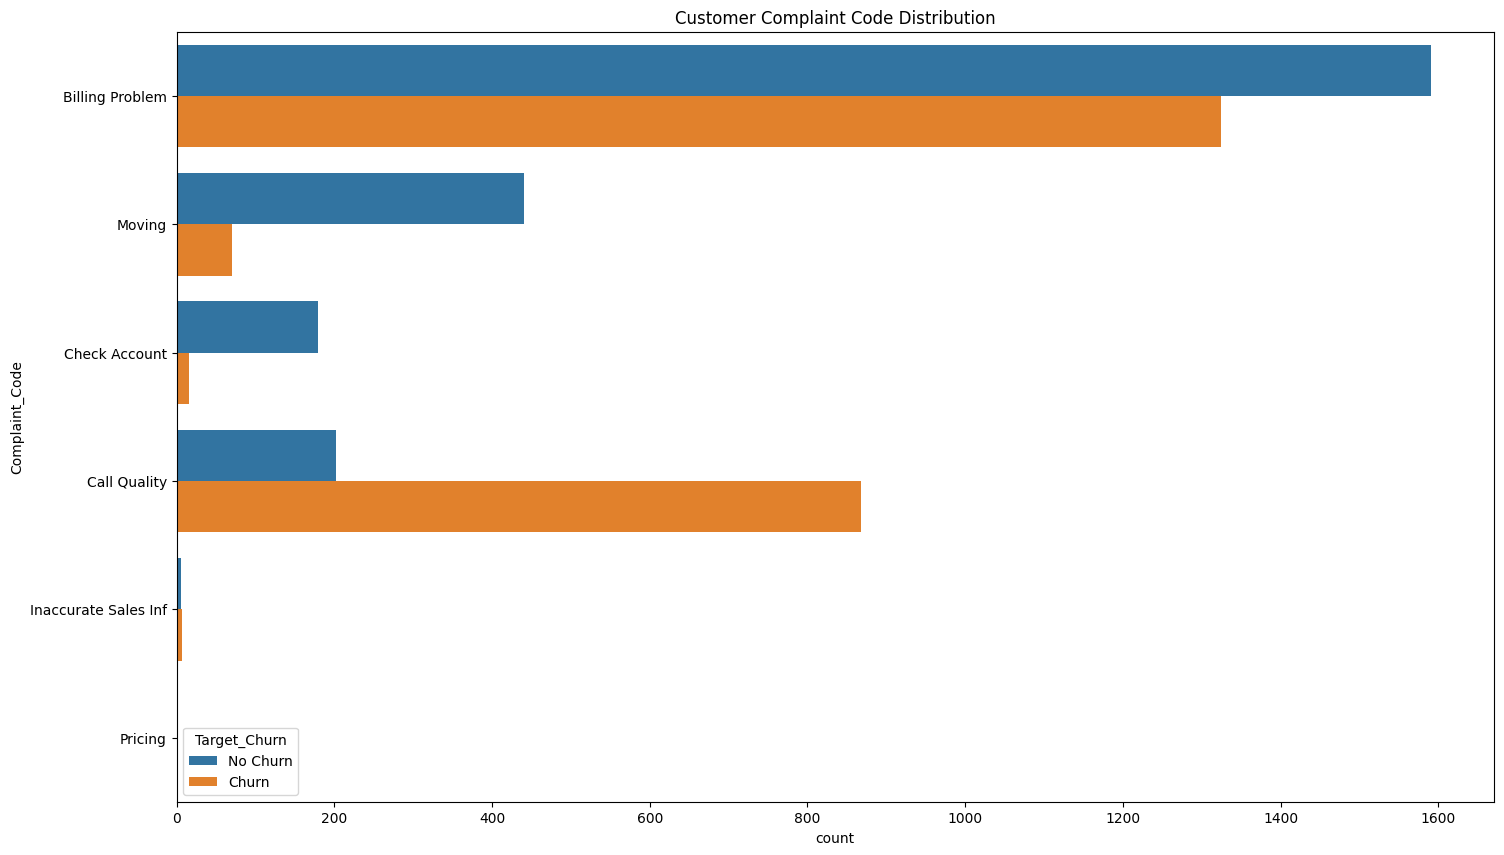

In [22]:
plt.figure(figsize=(17,10)) 
p=sns.countplot(y="Complaint_Code", hue='Target_Churn', data=data,) 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Complaint Code Distribution');

Больше всего отвалилось на серебряном тарифном плане

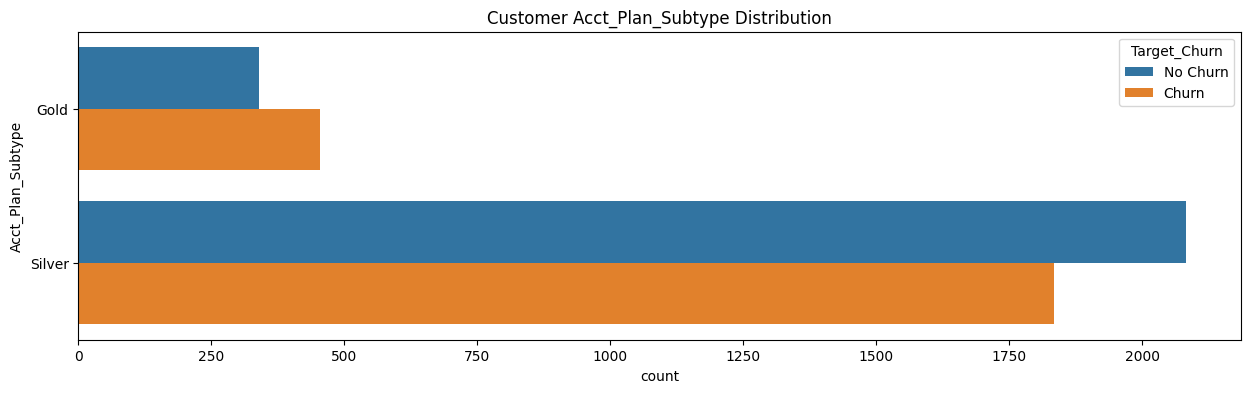

In [25]:
plt.figure(figsize=(15,4)) 
p=sns.countplot(y="Acct_Plan_Subtype", hue='Target_Churn', data=data,) 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Acct_Plan_Subtype Distribution');

У отвалившихся просрочка долга больше

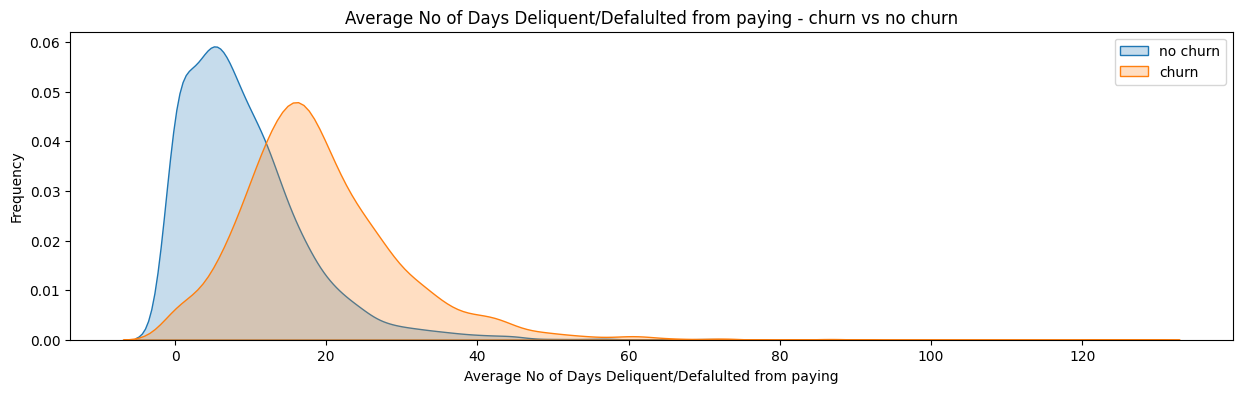

In [30]:
plt.figure(figsize=(15, 4))
ax = sns.kdeplot(data.loc[(data['Target_Code'] == 0), 'Avg_Days_Delinquent'],
                 shade=True, label='no churn')
ax = sns.kdeplot(data.loc[(data['Target_Code'] == 1), 'Avg_Days_Delinquent'],
                 shade=True, label='churn')
ax.set(xlabel='Average No of Days Deliquent/Defalulted from paying',
       ylabel='Frequency')
plt.title('Average No of Days Deliquent/Defalulted from paying - churn vs no churn')
plt.legend();

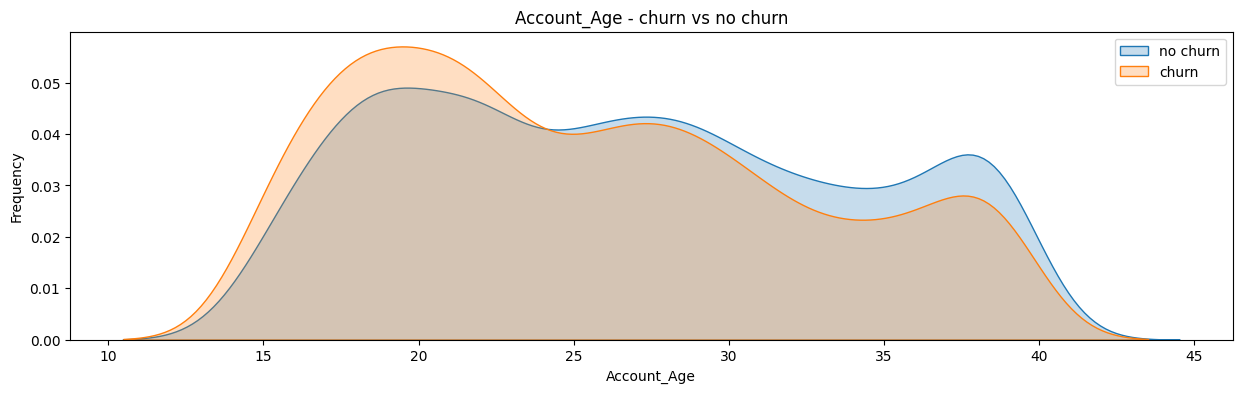

In [32]:
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0), 'Account_Age'], shade=True, label='no churn') 
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1), 'Account_Age'], shade=True, label='churn') 
ax.set(xlabel='Account_Age', ylabel='Frequency') 
plt.title('Account_Age - churn vs no churn') 
plt.legend();

### Выбор функции для уровнения

Преобразуем тип object в значения 1, 2, 3 и тд

In [36]:
data["Acct_Plan_Subtype"] = data["Acct_Plan_Subtype"].astype('category').cat.codes
data["Complaint_Code"] = data["Complaint_Code"].astype('category').cat.codes

In [39]:
data[["Acct_Plan_Subtype","Complaint_Code"]].head()

,Acct_Plan_Subtype,Complaint_Code
0,0,0
1,1,4
2,0,0
3,1,0
4,0,0


Разобъем данные

In [41]:
target = 'Target_Code' 
X = data.drop(['Target_Code', 'Target_Churn'], axis=1) 
y = data[target] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)

Отбор наиболее важных параметров для функции

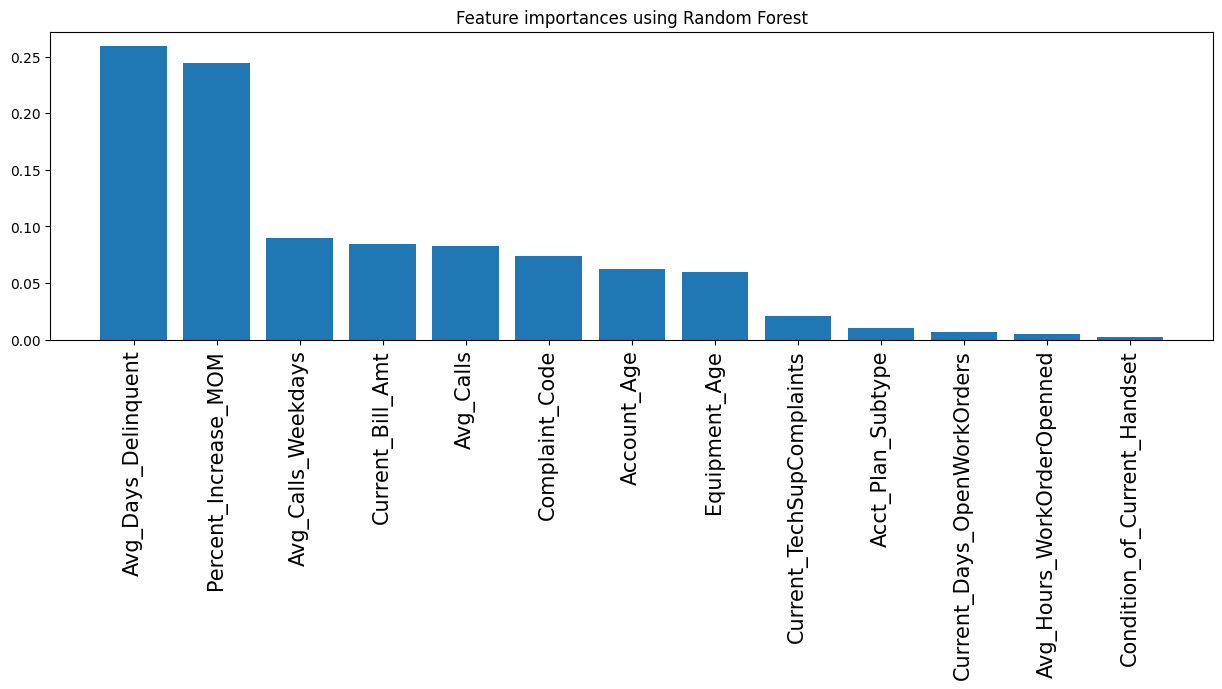

In [42]:
forest=RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

importances=forest.feature_importances_
features = data.drop(['Target_Code','Target_Churn'], axis=1).columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical', fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Лигистическая регрессия

In [43]:
import statsmodels.api as sm 

In [44]:
top7_features = ['Avg_Days_Delinquent','Percent_Increase_MOM',
                 'Avg_Calls_Weekdays','Current_Bill_Amt',
                 'Avg_Calls','Complaint_Code','Account_Age'] 
logReg = sm.Logit(y_train, X_train[top7_features]) 
logistic_regression = logReg.fit() 

Optimization terminated successfully.
         Current function value: 0.551146
         Iterations 8


In [46]:
logistic_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Target_Code   No. Observations:                 4001
Model:                          Logit   Df Residuals:                     3994
Method:                           MLE   Df Model:                            6
Date:                Mon, 06 Feb 2023   Pseudo R-squ.:                  0.2044
Time:                        23:53:17   Log-Likelihood:                -2205.1
converged:                       True   LL-Null:                       -2771.7
Covariance Type:            nonrobust   LLR p-value:                1.433e-241
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg_Days_Delinquent      0.1109      0.005     24.620      0.000       0.102       0.120
Percent_Increase_MOM    -0.3922      0.049     -7.985      0.000      -0.488      -0.296
Avg_Calls_Weekdays   -3.315e-06   1.43e-06     -2.313      0.021   -6.12e-06   -5.07e-07
Current_Bill_Amt     -2.385e-07   2.36e-06     -0.101      0.919   -4.85e-06    4.38e-06
Avg_Calls            -1.817e-06   5.05e-06     -0.360      0.719   -1.17e-05    8.08e-06
Complaint_Code          -0.2084      0.032     -6.588      0.000      -0.270      -0.146
Account_Age             -0.0479      0.003    -16.495      0.000      -0.054      -0.042
========================================================================================
"""

Коэффициенты

In [47]:
logistic_regression.params

Avg_Days_Delinquent     1.109226e-01
Percent_Increase_MOM   -3.922044e-01
Avg_Calls_Weekdays     -3.315366e-06
Current_Bill_Amt       -2.385475e-07
Avg_Calls              -1.817086e-06
Complaint_Code         -2.083688e-01
Account_Age            -4.794911e-02
dtype: float64

In [48]:
coef = logistic_regression.params

In [49]:
from typing import NewType

FunctionCoefficients = NewType('FunctionCoefficients', pd.Series)


def churn_probability(coef: FunctionCoefficients,
                      Avg_Days_Delinquent,
                      Percent_Increase_MOM,
                      Avg_Calls_Weekdays,
                      Current_Bill_Amt,
                      Avg_Calls,
                      Complaint_Code,
                      Account_Age) -> float:
    """Logistic regression equation"""
    return coef[0]*Avg_Days_Delinquent \
        + coef[1]*Percent_Increase_MOM \
        + coef[2]*Avg_Calls_Weekdays \
        + coef[3]*Current_Bill_Amt \
        + coef[4]*Avg_Calls \
        + coef[4]*Complaint_Code \
        + coef[4]*Account_Age


Пример

Вероятность ухода конкретного человека

In [50]:
ch = churn_probability(coef, 40, 5, 39000, 12000, 9000, 0, 17)
p = np.exp(ch)/(1 + np.exp(ch))
p

0.9111157767643199